# Data wrangling and EDA

## Introduction

In this notebook, I'm going to perform an exploratory analysis for UK based online retail store dataset. EDA is one of the most important step of the data science process. Because of the EDA, stockholders or owners ask the right questions and validate their business assumptions with thorough investigation. Also, EDA will spot any potential anomalies in data to avoid feeding wrong data to machine learning model. I will focus on the overall workflow of EDA, visualizing the results. 

## Contents

1. Context of data
2. Data Cleaning 
3. Exploratory Data Analysis
4. Results 
5. Conclusion

## 1. Context of Data

The dataset consist of transactoinal data with customers in different countries who make purchases from an online retail company based in the UK that sells unique all occasion gifts. 

* Company: UK based and registered non-store online retail 
* Products for selling: Mainly all occasion gifts
* Customers: Most are wholesalers around the world
* Transactions Period: 12/1/2010 to 12/9/2011

## 2. Data cleaning

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import os
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from altair import Chart, X, Y, Axis, SortField

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.1f}'.format

%matplotlib inline

### Load Data

In [3]:
retail_data = pd.read_excel('Online Retail.xlsx')

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [4]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom


Understanding each variable means:

* InvoiceNo: A number assigned to each transaction
* StockCode: Product code
* Description: Product name
* Quantity: Number of products purchased for each transaction
* Invoice date: Timestamp for each transaction
* UnitPrice: Product price per unit
* CustomerID: Unique identifier each customer
* Country: Country name

In [5]:
# check missing values

retail_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We can see that there are some missing values for Description and CustomerID. 

In [6]:
# remove the missing values
retail_data = retail_data.dropna()

In [7]:
retail_data.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.0,406829.0,406829.0
mean,12.1,3.5,15287.7
std,248.7,69.3,1713.6
min,-80995.0,0.0,12346.0
25%,2.0,1.2,13953.0
50%,5.0,1.9,15152.0
75%,12.0,3.8,16791.0
max,80995.0,38970.0,18287.0


From the descriptive statistics, there are two things are interesting. 

1. Quantity has negative values
2. Unit price has zero values

If unit price is zero, is this item FREE? 

Our next step will be remove negative values from the Quantity and find out total money spent on each purchase

In [8]:
df = retail_data[retail_data['Quantity']>0]

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.0,397924.0,397924.0
mean,13.0,3.1,15294.3
std,180.4,22.1,1713.2
min,1.0,0.0,12346.0
25%,2.0,1.2,13969.0
50%,6.0,1.9,15159.0
75%,12.0,3.8,16795.0
max,80995.0,8142.8,18287.0


Now we can see that negative values are removed. Now we want to see how much money is spent on each purchase. 

In [10]:
df['Amount_Spent'] = df.Quantity*df.UnitPrice
df.head()

<ipython-input-10-b33c2a7c9276>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3


Before the EDA, we add a few columns that consist of the year, month, day, week, weekday, dayofyear. 

In [11]:
df['year_month'] = df['InvoiceDate'].map(lambda x: 100*x.year + x.month)
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['week'] = df['InvoiceDate'].dt.week
df['weekday'] = df['InvoiceDate'].dt.weekday
df['dayofyear'] = df['InvoiceDate'].dt.dayofyear
df['hour'] = df['InvoiceDate'].dt.hour

<ipython-input-11-f7c40c78f4fb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-f7c40c78f4fb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-f7c40c78f4fb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-f7c40c7

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent,year_month,year,month,day,week,weekday,dayofyear,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,15.3,201012,2010,12,1,48,2,335,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3,201012,2010,12,1,48,2,335,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,22.0,201012,2010,12,1,48,2,335,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3,201012,2010,12,1,48,2,335,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20.3,201012,2010,12,1,48,2,335,8


## 3. Exploratory Data Analysis (EDA)

### Highest number of orders and money spent on purchases

In [13]:
df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by = 'InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


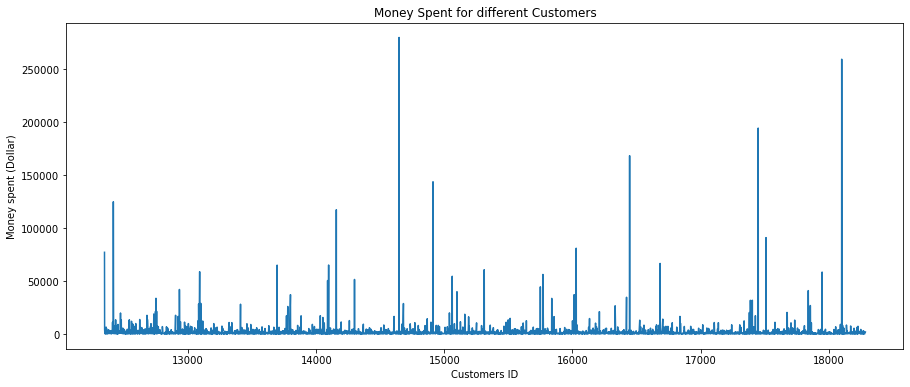

In [14]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.Amount_Spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [15]:
money_spent.sort_values(by = 'Amount_Spent', ascending =False).head()

,CustomerID,Country,Amount_Spent
1698,14646.0,Netherlands,280206.0
4210,18102.0,United Kingdom,259657.3
3737,17450.0,United Kingdom,194550.8
3017,16446.0,United Kingdom,168472.5
1888,14911.0,EIRE,143825.1


From the results we observe that most orders are made in the UK and customers from Netherlands spend the highest amount of money in their purchases.

In [16]:
most_sold = df['Description'].value_counts().head(15)
most_sold

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
PAPER CHAIN KIT 50'S CHRISTMAS        1019
SPOTTY BUNTING                        1017
LUNCH BAG SPACEBOY DESIGN             1008
LUNCH BAG CARS BLUE                    989
HEART OF WICKER SMALL                  985
Name: Description, dtype: int64

### Now we want to investigate that number of orders per month, day, and hour.

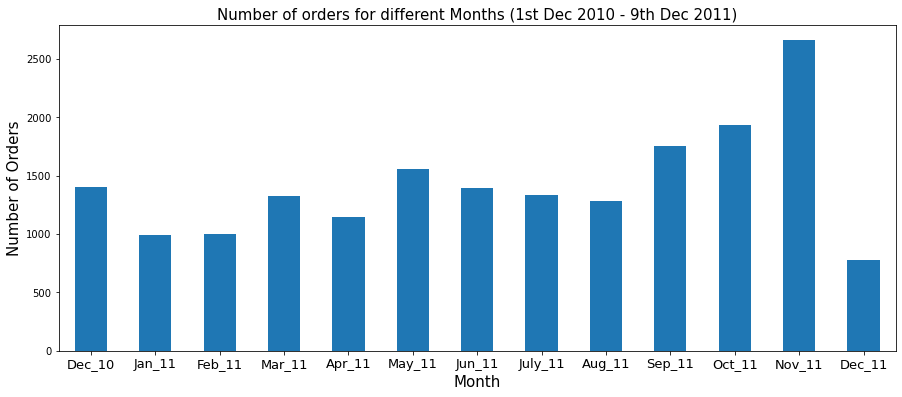

In [17]:
ax = df.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind ='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

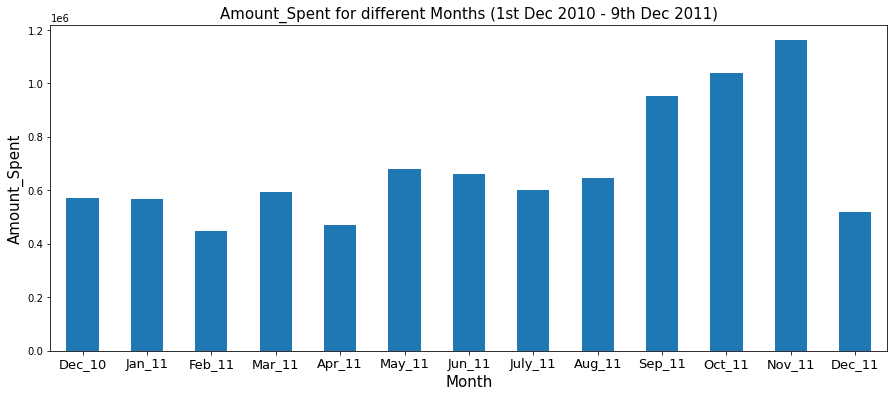

In [18]:
ax = df.groupby('year_month')['Amount_Spent'].sum().sort_index().plot(kind ='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Amount_Spent',fontsize=15)
ax.set_title('Amount_Spent for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

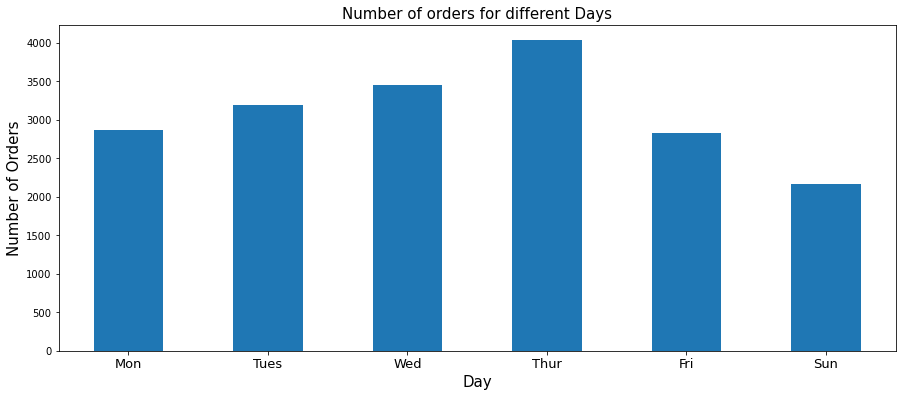

In [19]:
#df.groupby('InvoiceNo')['weekday'].unique().value_counts().sort_index()

ax = df.groupby('InvoiceNo')['weekday'].unique().value_counts().sort_index().plot(kind ='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tues','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=13)
plt.show()

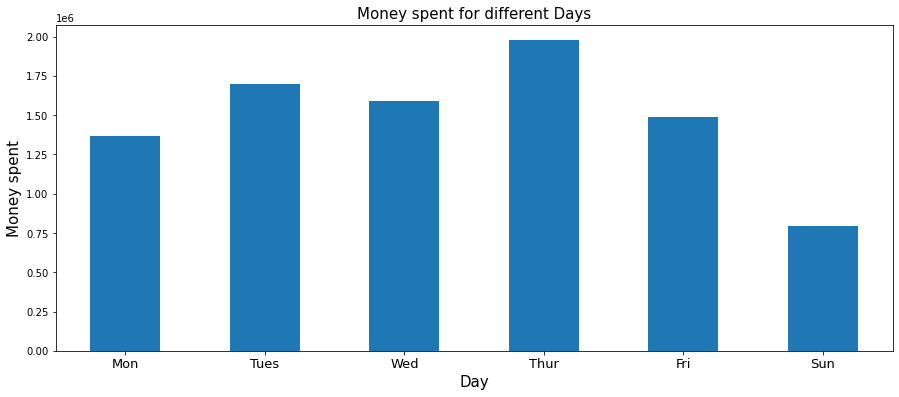

In [21]:
ax = df.groupby('weekday')['Amount_Spent'].sum().sort_index().plot(kind ='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Money spent',fontsize=15)
ax.set_title('Money spent for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tues','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=13)
plt.show()

In [22]:
df.groupby('InvoiceNo')['weekday'].unique().value_counts().sort_index()

[0]    2863
[1]    3185
[2]    3455
[3]    4033
[4]    2831
[6]    2169
Name: weekday, dtype: int64

In [23]:
df.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

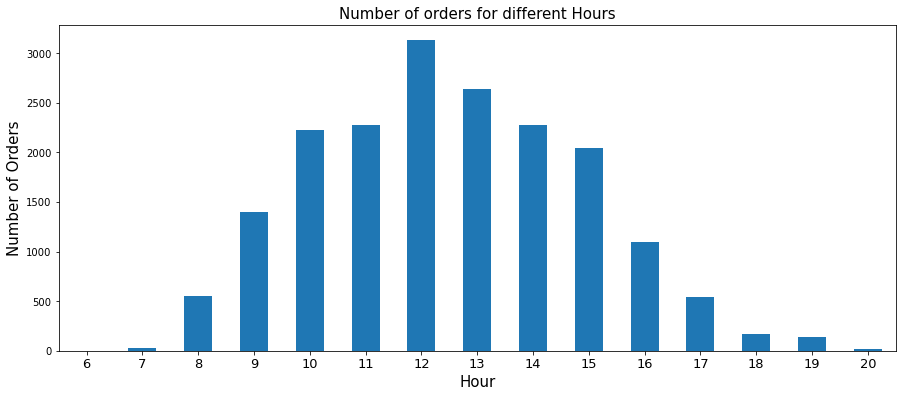

In [24]:
ax = df.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind ='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()

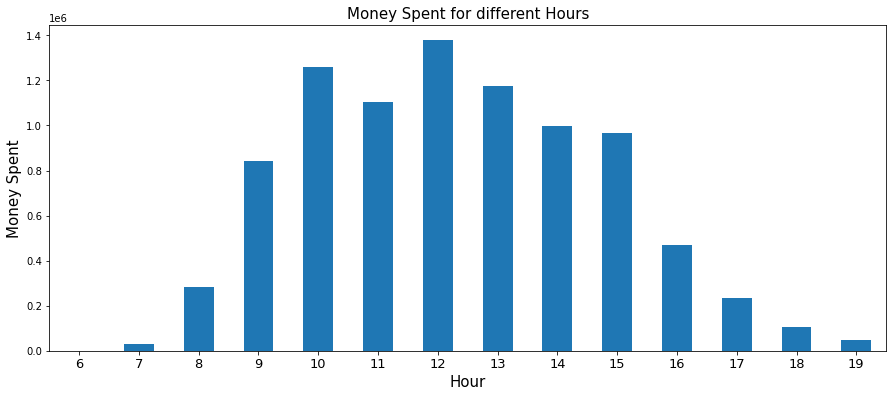

In [25]:
ax = df.groupby('hour')['Amount_Spent'].sum().iloc[:-1].sort_index().plot(kind ='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Money Spent',fontsize=15)
ax.set_title('Money Spent for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()

In [26]:
df_free = df[df['UnitPrice']==0]
df_free

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_Spent,year_month,year,month,day,week,weekday,dayofyear,hour
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0,201012,2010,12,5,48,6,339,14
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0,201012,2010,12,16,50,3,350,14
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0,201012,2010,12,21,51,1,355,13
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,201101,2011,1,6,1,3,6,16
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,201101,2011,1,6,1,3,6,16
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0.0,201101,2011,1,13,2,3,13,15
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0.0,201102,2011,2,10,6,3,41,13
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0.0,201103,2011,3,23,12,2,82,10
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0.0,201103,2011,3,30,13,2,89,12
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0,201104,2011,4,4,14,0,94,14


C:\Users\batka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



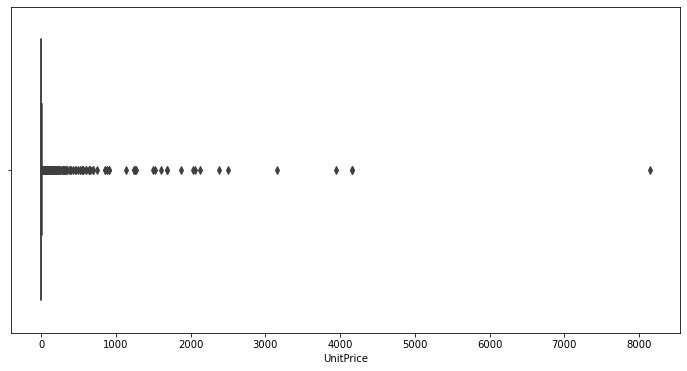

In [27]:
plt.subplots(figsize=(12,6))
sns.boxplot(df.UnitPrice)
plt.show()

In [28]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

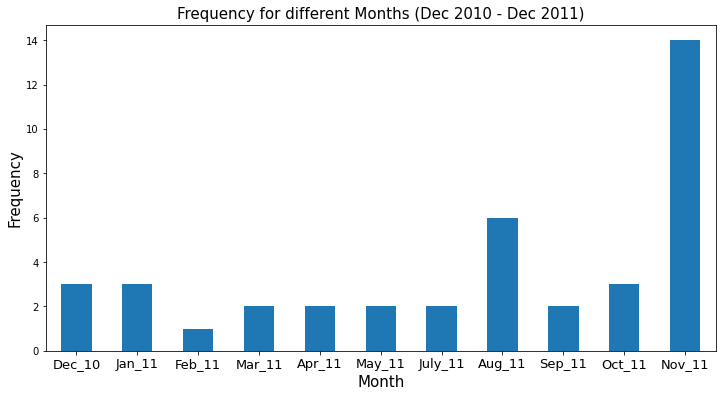

In [29]:
ax = df_free.year_month.value_counts().sort_index().plot(kind = 'bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

Company gave out 2-4 free items to customers per month (except Nov 2011) but it is uncertain why they do that. 

## Each countries transactional patterns

### How many orders for each country?

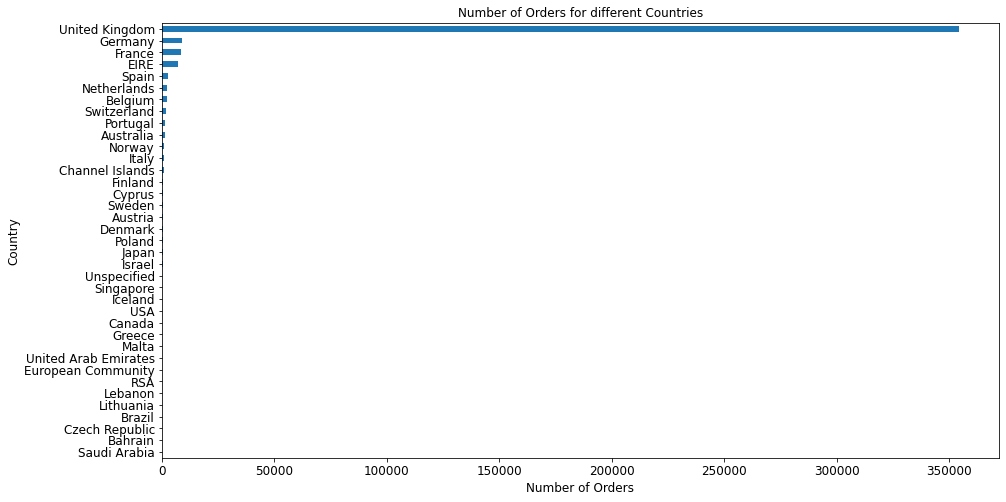

In [30]:
country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
country_orders.plot(kind = 'barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

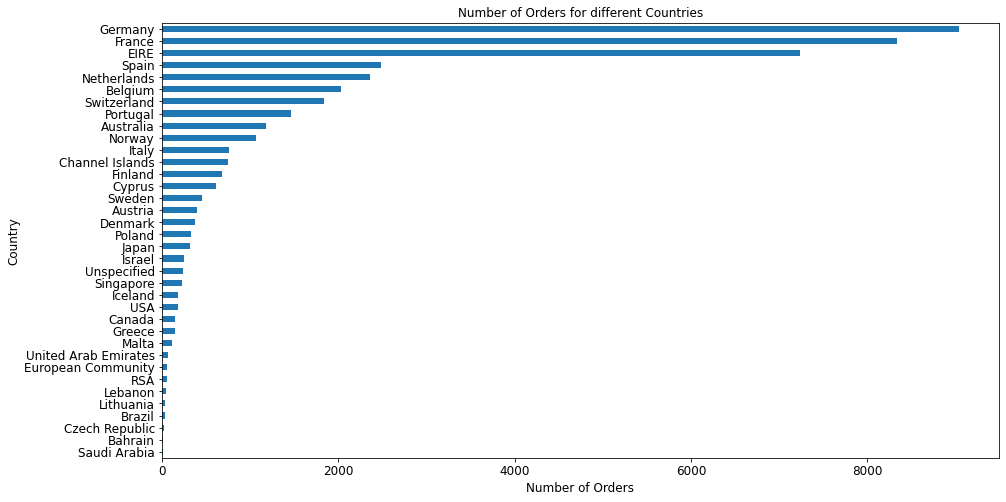

In [31]:
country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
country_orders.plot(kind = 'barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

### How much money spent by each country?

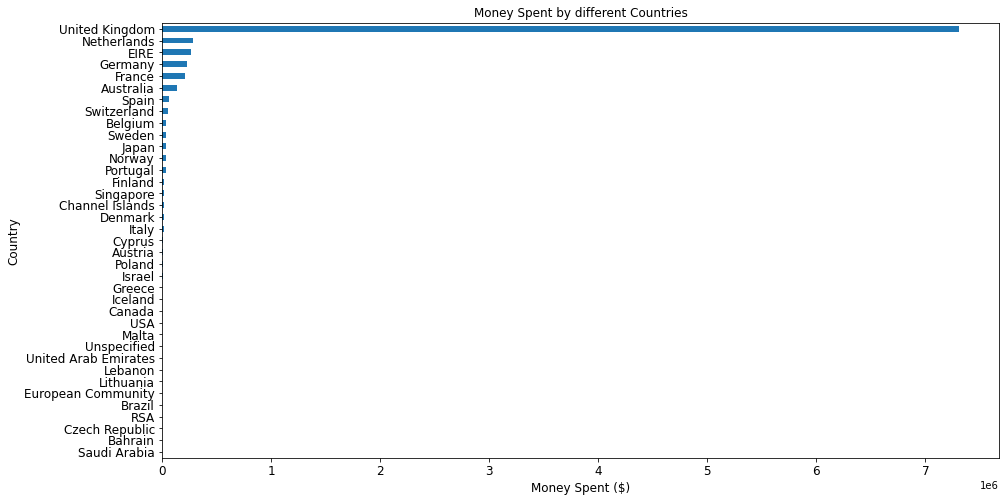

In [32]:
country_ASpent = df.groupby('Country')['Amount_Spent'].sum().sort_values()
# del country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
country_ASpent.plot(kind = 'barh', fontsize=12)
plt.xlabel('Money Spent ($)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

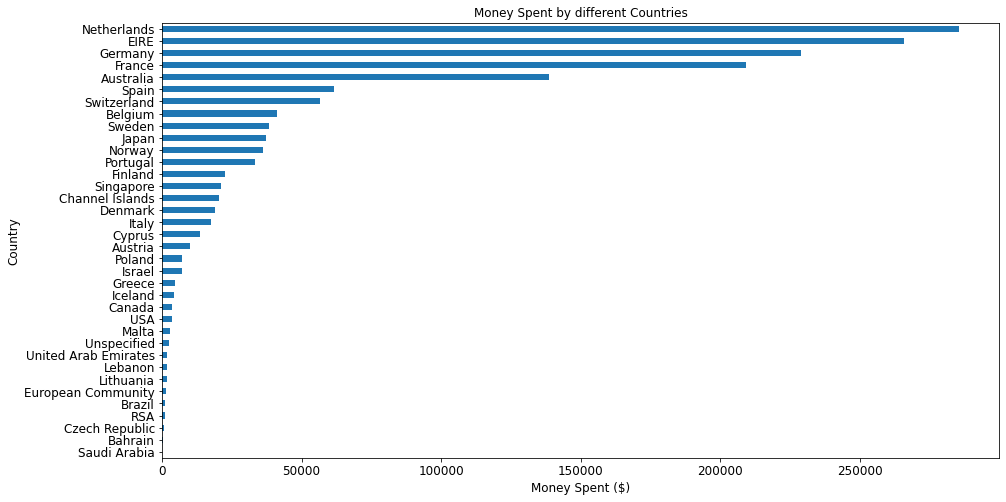

In [33]:
country_ASpent = df.groupby('Country')['Amount_Spent'].sum().sort_values()
del country_ASpent['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
country_ASpent.plot(kind = 'barh', fontsize=12)
plt.xlabel('Money Spent ($)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

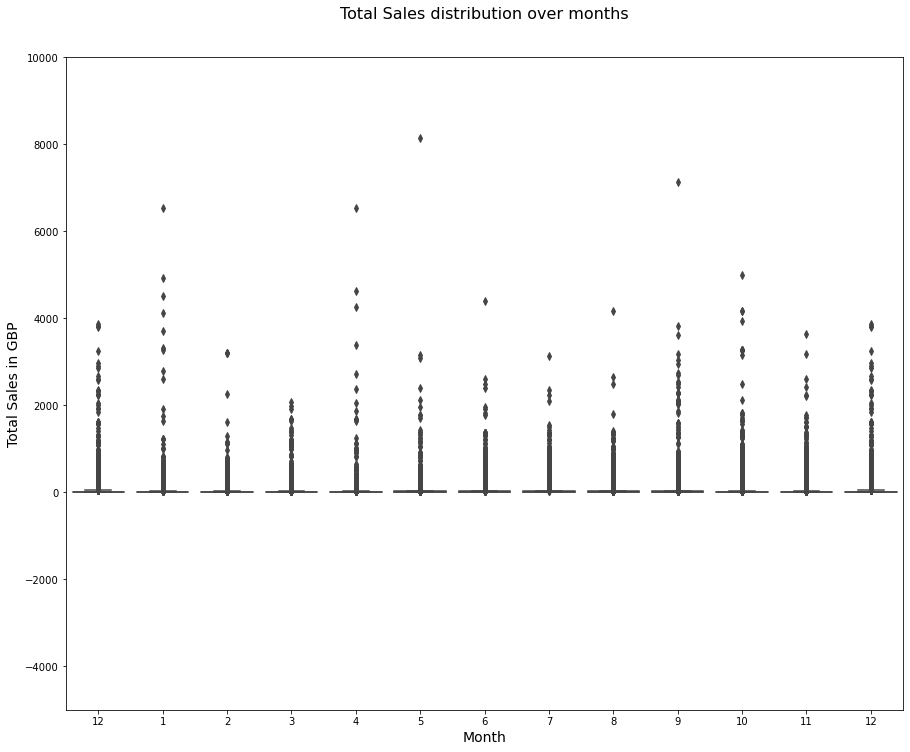

In [34]:
g = sns.boxplot(x = 'month',y= 'Amount_Spent', data = df, order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
g.set_title('Total Sales distribution over months', size = 16, y = 1.05)
g.set_xlabel('Month', size = 14)
g.set_ylabel('Total Sales in GBP', size = 14)
g.figure.set_size_inches(15, 12)
g.set_ylim(-5000, 10000)
plt.show()

As the company receives the highest number of orders from customers in the UK, it is natural to see that customers in the UK spend the most on their purchases.

Same as before, UK is removed for clearer comparison among other countries. The TOP 5 countries (including UK) that spend the most money on purchases are as below:
* United Kingdom
* Netherlands
* Ireland (EIRE)
* Germany
* France

## 4. Results

1. The customer with the highest number of orders comes from the United Kingdom (UK)
2. The customer with the highest money spent on purchases comes from Netherlands
3. The company receives the highest number of orders from customers in the UK (since it is a UK-based company). Therefore, the TOP 5 countries (including UK) that place the highest number of orders are as follow → United Kingdom, Germany, France, Ireland (EIRE), Spain
4. As the company receives the highest number of orders from customers in the UK (since it is a UK-based company), customers in the UK spend the most on their purchases. Therefore, the TOP 5 countries (including UK) that spend the most money on purchases are as follow → United Kingdom, Netherlands, Ireland (EIRE), Germany, France
5. November 2011 has the highest sales. The month with the lowest sales is undetermined as the dataset consists of transactions until 9th December 2011 in December
6. There are no transactions on Saturday between 1st Dec 2010 — 9th Dec 2011
7. The number of orders received by the company tends to increases from Monday to Thursday and decrease afterward
8. The company receives the highest number of orders at 12:00pm. Possibly most customers made purchases during lunch hour between 12:00pm — 2:00pm
9. The company tends to give out FREE items for purchases occasionally each month (Except June 2011). However, it is not clear what factors contribute to giving out the FREE items to the particular customers

## 5. Conclusion

Simply by performing EDA on the dataset we’ve identified some interesting results. Of course, the results don’t just stop here. They can always be used to validate business assumptions (if any) and interpret a machine learning model’s output and so much more!